In [ ]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml("mnist_784",as_frame=False)
x,y=mnist["data"],mnist["target"]
print(x.shape)
# get_ipython().run_line_magic('matplotlib', 'inline')

(70000, 784)


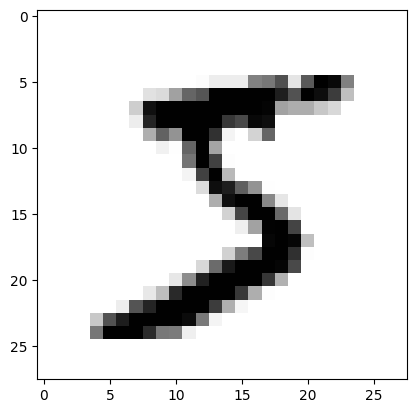

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
s = x[0]
si=s.reshape(28,28)
plt.imshow(si,cmap=matplotlib.cm.binary)
# plt.axis("off")
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]
print(y_train)

['5' '0' '4' ... '5' '6' '8']


In [ ]:
import numpy as np
y_train=y_train.astype(np.int8)
print(y_train)

[5 0 4 ... 5 6 8]


In [ ]:
y_train_5=(y_train==5)
print(y_train_5)

[ True False False ...  True False False]


In [ ]:
y_test_5=(y_test==5)
print(y_test_5)

[False False False ... False False False]


In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([s])


array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)
print(y_train_pred)

[ True False False ...  True False False]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847